## Continuous RQA

Continuous RQA (contRQA) is used to examine the dynamics of continuous behaviour sequences, such as physiological signals (e.g., heart rate or EEG data) or tracking data from a motion capture system. Recurrence analysis allows us to visualise the dynamics of such behaviours by plotting 'recurrent' states on a 2D recurrence plot. For continuous RQA, the data points are mapped to orthogonal axes, 𝑥𝑖 = 1,2,...,𝑛 and 𝑦𝑗 = 1,2,...,𝑛, representing a 2-dimensional plot. The states 𝑥𝑖 and 𝑦𝑗 that reoccur are plotted, indicated by blue points on the recurrence plot. From the recurrence plot, we can determine the degree of recurrence, the persistence of repeating sequences, and other patterns that give us insight into the underlying dynamics of the system. RQA quantifies these properties through various metrics, including:

- Recurrence Rate (%REC): The percentage of recurrent points in the plot, which indicates how often states reoccur.
- Determinism (%DET): The percentage of recurrent points that form diagonal lines of at least a given length (e.g., 2 points), indicating patterns that repeat in the same order.
- Maxline: The length of the longest diagonal sequence of recurrent points.
- Meanline: The average length of diagonal lines in the plot, giving insight into typical repeating sequences.
- Entropy (ENT): The Shannon entropy of the distribution of diagonal line lengths, which measures the complexity of recurrent patterns.
- Laminarity (LAM): The percentage of recurrent points forming vertical lines, which can reflect how states are trapped for extended periods.

#### Parameters for Running Continuous RQA

To run RQA for continuous data, we need to select three parameters:

- Time delay: This represents the interval between samples required to unfold the temporal structure of a system's trajectory. The appropriate delay helps to reconstruct the system’s dynamics in the phase space. For continuous RQA, time delay is typically calculated using an average mutual information (AMI) analysis. To learn more about this, see ami.ipynb in the current tutorial.
- Embedding dimension: This is the number of dimensions needed to recover the system's phase space. For continuous RQA, embedding dimension is typically calculated using a false nearest neighbors (FNN) analysis. To learn more about this, see fnn.ipynb in the current tutorial.
- Radius: This defines how close two states must be to be considered recurrent. Unlike categorical RQA, the radius for continuous data is a threshold based on a distance metric (e.g., Euclidean distance), ensuring that nearby—but not necessarily identical—states are considered recurrent.


#### Let's Practice Running RQA on Continuous Data

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run the RQA analysis, and create visualizations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [2]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_rqa
from utils.plot_utils import plot_rqa, plot_ts_and_rqa, plot_windowed_ts_and_rqa

C:\Users\MQ20188409\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytools\persistent_dict.py:59: UserWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply RQA to some real data—in this case, acceleration data from a person walking (walkerAfriend.txt).

Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkerAfriend.txt


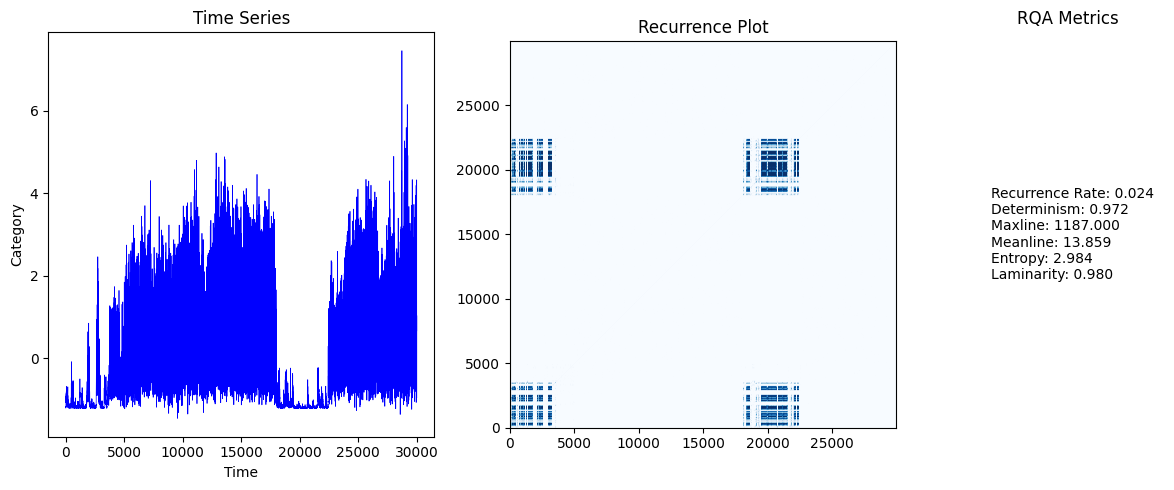

RQA analysis and plotting completed successfully!


In [3]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkerAfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0].to_frame()

    # Interpolate any missing data that might be present in the file
    continuous_data = interpolate_missing_data(continuous_data)

    # Apply a filter to the data
    continuous_data = filter_data(continuous_data)
    
    # Normalise the data by using a z-score
    continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

    # Perform RQA using perform_rqa function from rqa_utils
    rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

    # Print RQA results
    # Create RQA metrics dictionary
    for column, result in rqa_results.items():
        rqa_metrics = {
            'Recurrence Rate': result.recurrence_rate,
            'Determinism': result.determinism,
            'Maxline': result.longest_diagonal_line,
            'Meanline': result.average_diagonal_line,
            'Entropy': result.entropy_diagonal_lines,
            'Laminarity': result.laminarity,
        }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_rqa(continuous_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
    
    print('RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see the following RQA metrics for the data:

- %REC: 2.4% - This value tells us how often the system returns to a previous state, providing insight into the recurrence within the individual's walking dynamics. Higher recurrence values indicate more frequent returns to similar acceleration values.
- %DET: 97.2% - This represents the proportion of recurrence points that form diagonal lines, reflecting the predictability of the walking pattern.
- Maxline: 1187 - This metric identifies the longest sequence of recurring acceleration patterns, showing the longest period over which the individual maintained a stable acceleration pattern.
- Meanline: 13.9 - This is the average length of diagonal lines in the recurrence plot, giving us insight into the typical duration for which the walking dynamics remain consistent.

Our walker was walking with a friend. Let's see how the RQA metrics above compare to the friend's acceleration data. Click "play" on the code chunk below to run the RQA on both the original walker and their friend. Observe the differences.

Loading file: walkerAfriend.txt


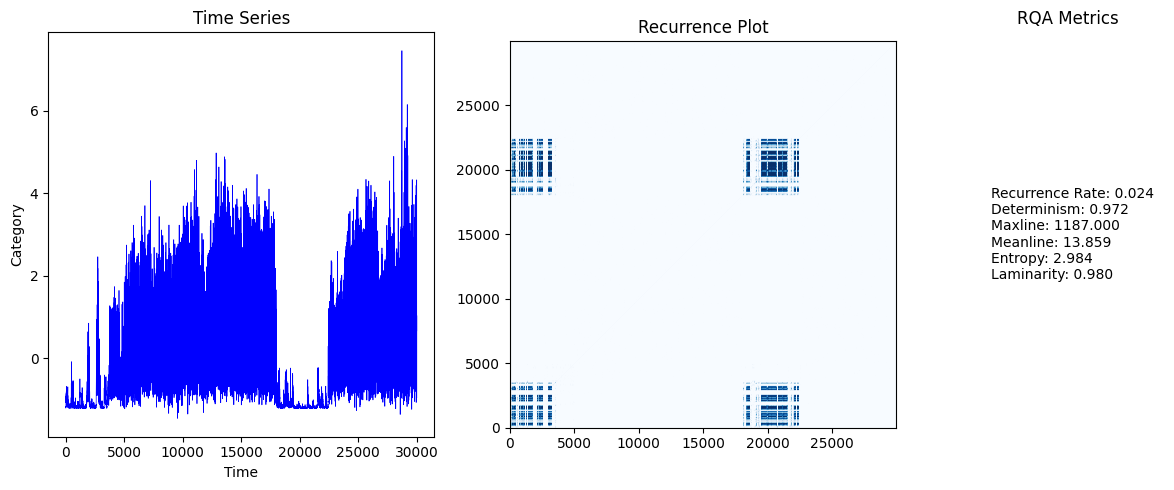

RQA analysis and plotting completed successfully!
Loading file: walkerBfriend.txt


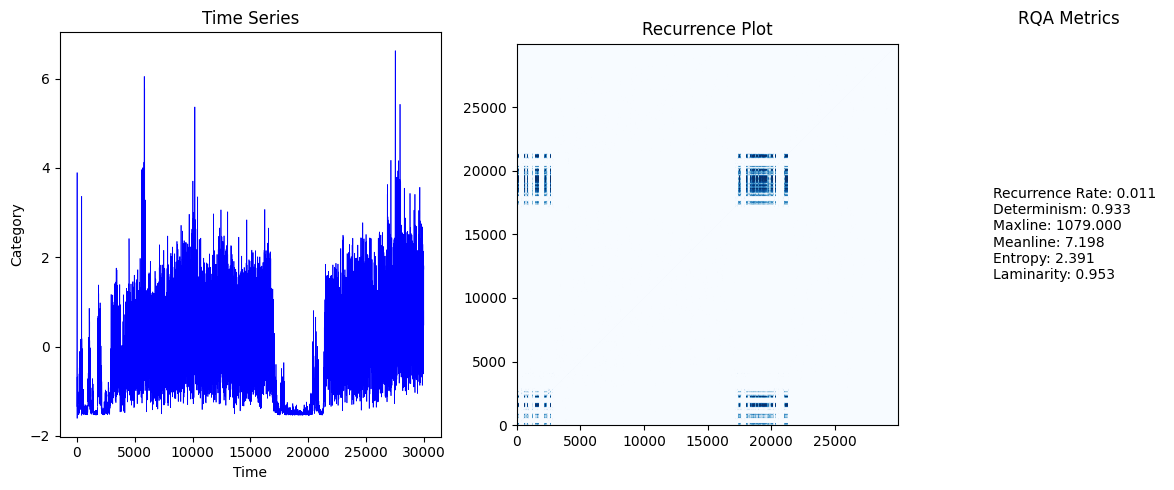

RQA analysis and plotting completed successfully!


In [5]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["walkerAfriend.txt", "walkerBfriend.txt"]

file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Loop through each file and perform RQA
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        print(f'Loading file: {file_name}')

        # Load the file into a DataFrame
        data = pd.read_csv(file_path, header=None)

        # Assume the data is a single unnamed column
        continuous_data = data.iloc[:, 0].to_frame()

        # Interpolate any missing data that might be present in the file
        continuous_data = interpolate_missing_data(continuous_data)

        # Apply a filter to the data
        continuous_data = filter_data(continuous_data)
    
        # Normalise the data by using a z-score
        continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

        # Print RQA results
        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_rqa(continuous_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
        
        print('RQA analysis and plotting completed successfully!')
    else:
        print(f'File {file_name} not found in directory {data_directory}')

#### Comparing the Results

If you examine the recurrence plots (RPs) and the resulting RQA metrics, you'll notice that the second walker shows less recurrent activity than the first. There are less blue lines in the second plot, and the RQA metrics are lower. This indicates less repetition (%REC) and less predictability (%DET) in the walking pattern for the second walker.

In [ ]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["walkerA.txt", "walkerB.txt"]

file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'minLine': 2,
    'getRP': True
}

# Radii values to iterate over
radii = [0.1, 0.2, 0.3]

# Check if the file exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the TXT file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0]

    # Convert the series to a DataFrame to maintain consistency with filter_data function
    continuous_data = continuous_data.to_frame()

    # Interpolate missing data
    continuous_data = interpolate_missing_data(continuous_data)

    # Filter the data
    continuous_data = filter_data(continuous_data)
    
    # Z-score normalization
    continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

    # Iterate over different radii values
    for radius in radii:
        print(f'Running RQA with radius: {radius}')
        rqa_params['radius'] = radius

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

        # Print RQA results
        for column, result in rqa_results.items():
            print(f'RQA results for column {column}:')
            print(f'Recurrence Rate: {result.recurrence_rate}')
            print(f'Determinism: {result.determinism}')
            print(f'Maxline: {result.longest_diagonal_line}')
            print(f'Meanline: {result.average_diagonal_line}')
            print(f'Entropy: {result.entropy_diagonal_lines}')
            print(f'Laminarity: {result.laminarity}')

        # Plot recurrence plot
        plot_rqa(rp_results[0].recurrence_matrix, save_image, f'images/rqa/{file_name}_rp_plot_radius_{radius}.png')
    
    print('RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

START HERE



Running RQA on a continuous time series requires the selection of hyperparameters, namely the time delay, embedding dimension, and radius. Let's see how different radii influence the RQA plot and resultant metrics:

Sometimes researchers wish to run a windowed RQA analysis. This allows us to return a range of RQA metrics and examine their trajectory over time. Let's run this now:

In [ ]:
# Set the directory path for the continuous data
data_directory = "data/rqaContinuous/"

# Save image or not
save_image = True  # Set to True to save plots as images

# Set the file name for continuous data
file_name = "b1000.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters for continuous data
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Set the frame rate and window size in seconds
fps = 10
window_size_seconds = 60  # Set window size in seconds
window_size = int(window_size_seconds * fps)  # Calculate window size in frames
overlap = 0.5  # 50% overlap
step_size = int(window_size * (1 - overlap))  # Step size for windows

# Check if the file exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the TXT file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0]

    # Convert the series to a DataFrame to maintain consistency with filter_data function
    continuous_data = continuous_data.to_frame()

    # Iterate over the data in windows with 50% overlap
    for start in range(0, len(continuous_data) - window_size + 1, step_size):
        print(f'Processing window starting at {start}')

        # Get the window of data
        window = continuous_data[start:start + window_size]

        # Interpolate missing data
        window = interpolate_missing_data(window)

        # Filter the data
        window = filter_data(window)
        
        # Z-score normalization
        window = (window - window.mean()) / window.std()

        # Perform RQA on the window
        rqa_results, rp_results = perform_rqa(window, **rqa_params)

        # Plot time series and recurrence plot side-by-side
        plot_windowed_ts_and_rqa(window.iloc[:, 0].values, rp_results[0].recurrence_matrix, save_image, f'images/rqa/{file_name}_window_{start}_combined_plot.png')

        # Print specific RQA results
        for column, result in rqa_results.items():
            print(f'RQA results for column {column}:')
            print(f'Recurrence Rate: {result.recurrence_rate}')
            print(f'Determinism: {result.determinism}')
            print(f'Maxline: {result.longest_diagonal_line}')
            print(f'Meanline: {result.average_diagonal_line}')
            print(f'Entropy: {result.entropy_diagonal_lines}')
            print(f'Laminarity: {result.laminarity}')
    
    print('Windowed RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')